In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [136]:
results_fns = os.listdir('results')

Model: mod1


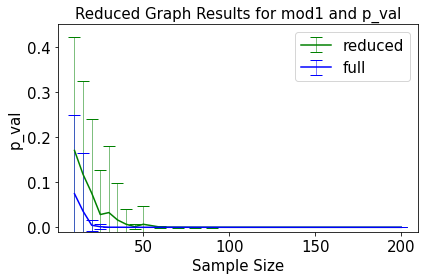

Model: mod2


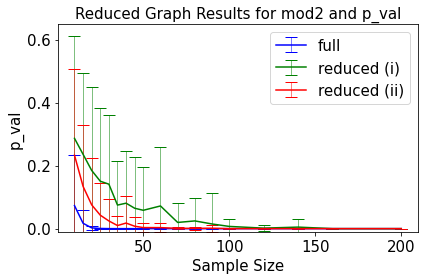

Model: mod3


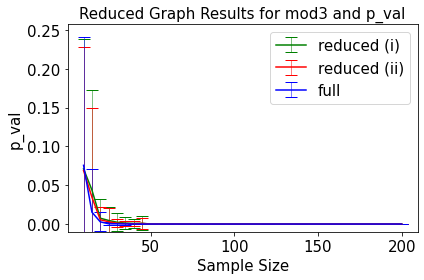

Model: mod4


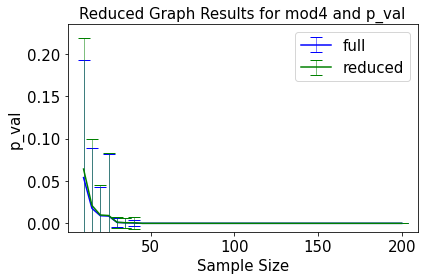

Model: mod5


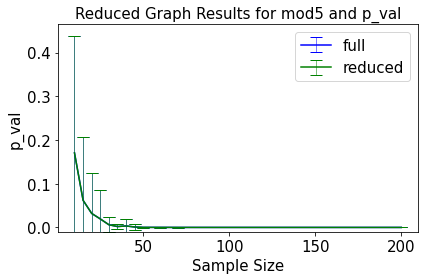

Model: mod1


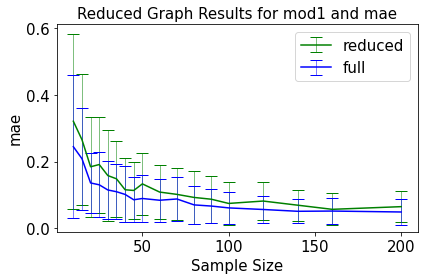

Model: mod2


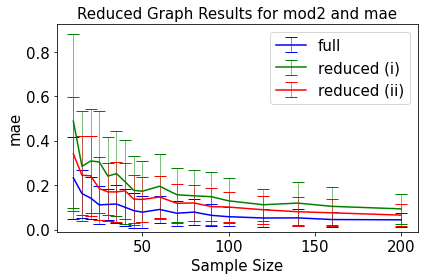

Model: mod3


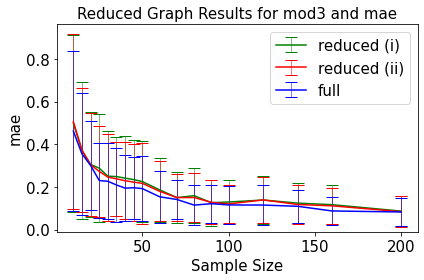

Model: mod4


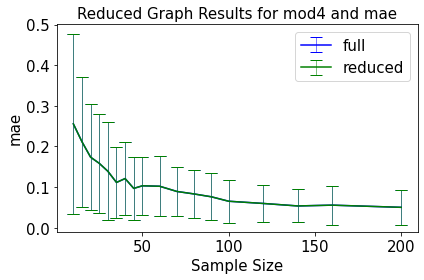

Model: mod5


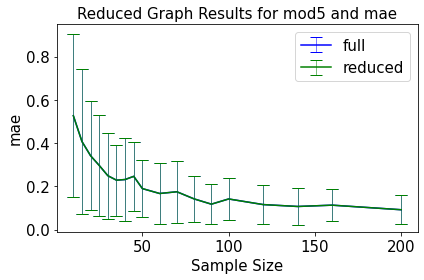

Model: mod1


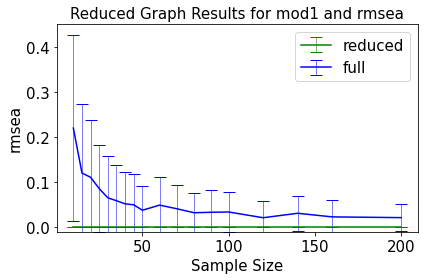

Model: mod2


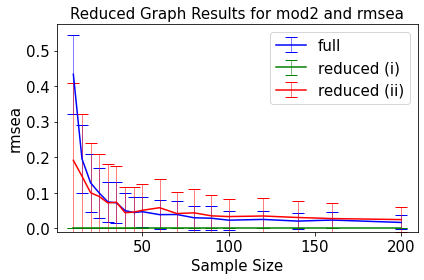

Model: mod3


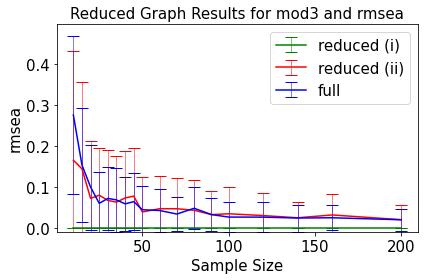

Model: mod4


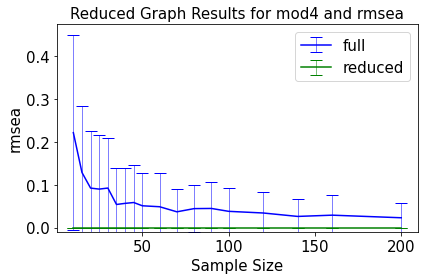

Model: mod5


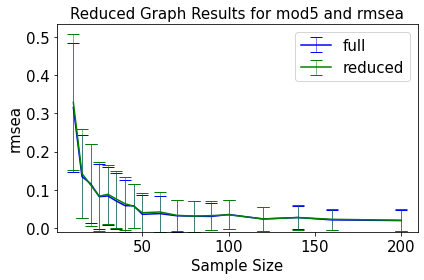

Model: mod1


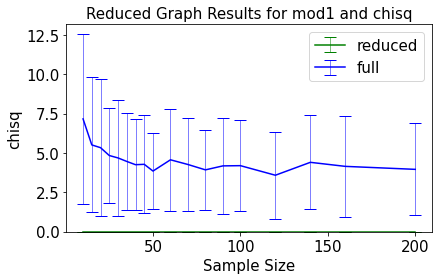

Model: mod2


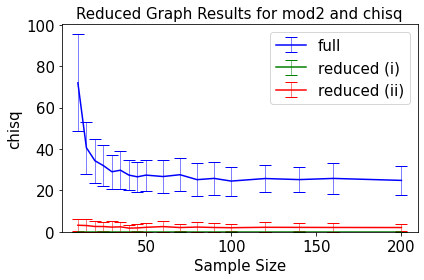

Model: mod3


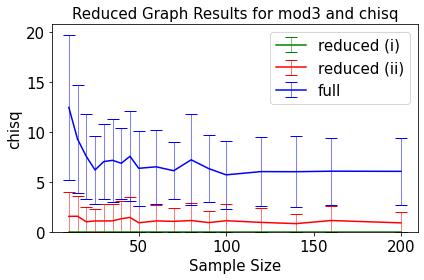

Model: mod4


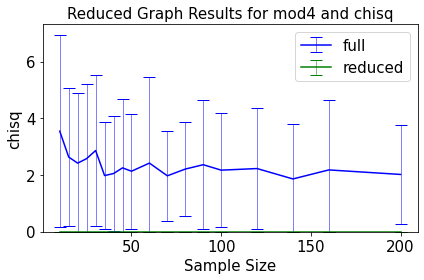

Model: mod5


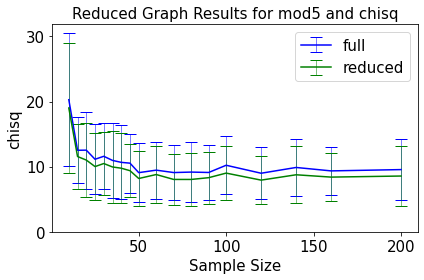

In [156]:

models = ['mod1_full', 'mod1_red', 'mod2_full', 'mod2_redi', 'mod2_redii', 'mod3_full',
         'mod3_redi', 'mod3_redii', 'mod4_full', 'mod4_red', 'mod5_full', 'mod5_red']


models_ = ['mod1', 'mod2', 'mod3', 'mod4', 'mod5']

attributes = ['p_val', 'mae', 'rmsea', 'chisq']

elw = 0.5
cs = 6
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
for attribute in attributes:
    
    for model in models_:
        print('Model:', model)
        for fn in results_fns:

            if model in fn:
                df = pd.read_csv('results/'+fn)
                df['mae'] = np.abs(df.coef - df.trucoef)
                sample_vals = np.unique(df.N.values)

                df_means = []
                df_ses = []
                for sample_val in sample_vals:
                    sub = df[df.N == sample_val]
                    sub_mean = pd.DataFrame(sub.mean()).T
                    sub_se = pd.DataFrame(sub.std()).T
                    df_means.append(sub_mean)
                    df_ses.append(sub_se)

                df_means = pd.concat(df_means)
                df_ses = pd.concat(df_ses)
                x = df_means.N.values
                y = df_means[attribute].values
                yerr = df_ses[attribute].values
                if 'full' in fn:
                    plt.errorbar(x, y, yerr=yerr, color='b', label='full', elinewidth=elw, capsize=cs)
                elif 'redii' in fn:
                    plt.errorbar(x, y, yerr=yerr,color='r', label='reduced (ii)', elinewidth=elw, capsize=cs)
                elif 'redi' in fn:
                    plt.errorbar(x, y, yerr=yerr,color='g', label='reduced (i)', elinewidth=elw, capsize=cs)
                else:
                    plt.errorbar(x, y, yerr=yerr,color='g', label='reduced', elinewidth=elw, capsize=cs)

        plt.title('Reduced Graph Results for {} and {}'.format(model, attribute), fontsize=15)
        plt.ylabel(attribute, fontsize=15)
        plt.xlabel('Sample Size', fontsize=15)
        plt.ylim(-0.01,)
        plt.legend(fontsize=15)
        plt.tight_layout()
        plt.savefig('{}_{}.png'.format(model, attribute), dpi=100)
        plt.show()